<a href="https://colab.research.google.com/github/1999putrivj/FINAL-PROJECT-UNO-DS-38/blob/main/Stage_1_Kelompok_1_Uno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pdXSZdcd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Descriptive Statistics

In [ ]:
df = pd.read_csv('/train.csv', sep=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/

/content/drive/MyDrive


In [4]:
!1s

/bin/bash: line 1: 1s: command not found


In [ ]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
31775,49,management,married,tertiary,no,78,yes,no,cellular,8,apr,65,3,-1,0,unknown,no
3131,49,blue-collar,married,secondary,no,2631,yes,no,unknown,14,may,76,2,-1,0,unknown,no
668,60,self-employed,married,primary,no,46,yes,no,unknown,6,may,202,4,-1,0,unknown,no
367,43,management,divorced,tertiary,no,1,yes,no,unknown,6,may,306,1,-1,0,unknown,no
2037,42,blue-collar,married,primary,no,-10,yes,no,unknown,9,may,291,4,-1,0,unknown,no


In [ ]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome','y']
nums = ['age', 'balance', 'campaign', 'pdays', 'previous']
timestamp = ['day', 'month', 'duration']

In [ ]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [ ]:
df[nums].describe()

,age,balance,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841,40.197828,0.580323
std,10.618762,3044.765829,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,63.000000,871.000000,275.000000


In [ ]:
df[cats].describe()

,job,marital,education,default,housing,loan,contact,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,36959,39922


In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value count kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Value count kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Value count kolom default:
no     44396
yes      815
Name: default, dtype: int64

Value count kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Value count kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Value count kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value count kolom poutcome:
unknown    36959
failure     4901
other       1840
success   

In [ ]:
for column in timestamp:
    print(f'''Value count kolom {column}:''')
    print(df[column].value_counts())
    print()

Value count kolom day:
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

Value count kolom month:
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

Value count kolom duration:
124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64



**A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?**

  Sebaiknya dtype untuk kolom day adalah object karena menunjukkan tanggal.

**B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?**

  Semua kolom tidak memiliki nilai kosong, karena nilai kosong pada dataset sudah dikonversikan menjadi unknown, oleh karena itu terdapat beberapa feature yang memiliki value unknown.

**C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)**

-Balance terendah adalah -8019, mungkin diperlukan
pemeriksaan lanjutan.

-Terdapat contact dan outcome yang unknown

-Nilai minimum pada kolom "duration" adalah 0





# Univariate Analysis


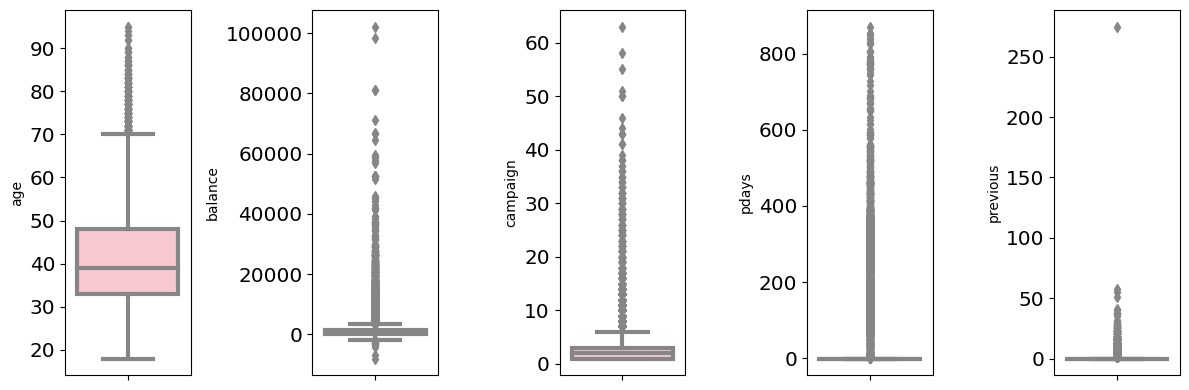

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='pink', orient='v')
    plt.tight_layout()

<ipython-input-14-6f74d9ca6520>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums[i]], color='turquoise')
<ipython-input-14-6f74d9ca6520>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums[i]], color='turquoise')
<ipython-input-14-6f74d9ca6520>:4: UserWarning: 

`distplot` is a depr

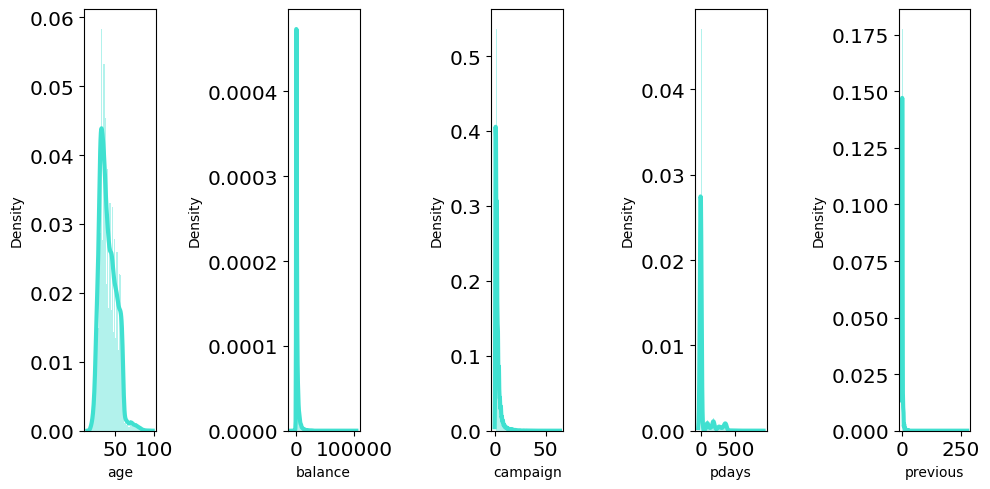

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.distplot(df[nums[i]], color='turquoise')
    plt.tight_layout()

- Terdapat banyak outliers dan skewed pada feature balance, campaign, pdays, dan previous. Menangani nilai outlier pada kolom balance, campaign, dan pdays jika diperlukan.

- Feature age sudah hampir mendekati distribusi normal.

Follow-up untuk Data Pre-processing:

- Menangani nilai outlier pada feature balance, campaign, pdays dan previous jika diperlukan.

- Mungkin perlu melakukan normalisasi atau transformasi pada kolom yang memiliki skewness signifikan untuk mendapatkan distribusi yang lebih normal, terutama pada kolom balance.


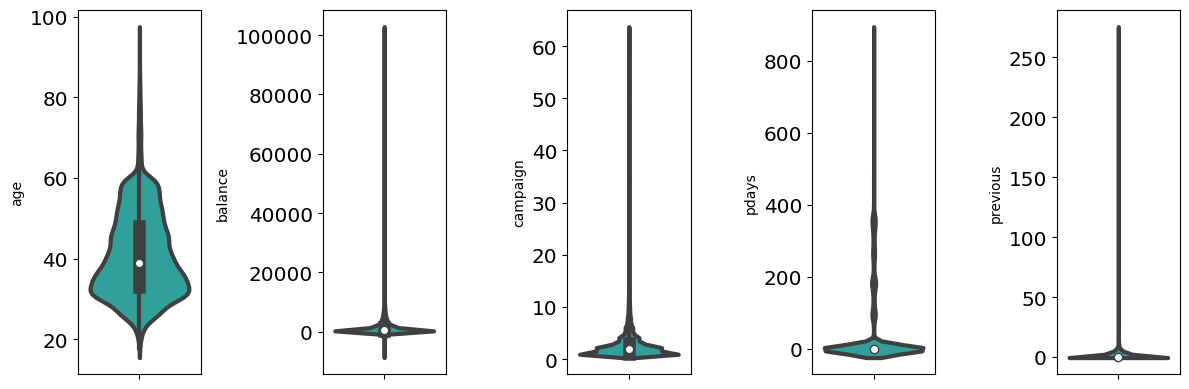

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='lightseagreen', orient='v')
    plt.tight_layout()

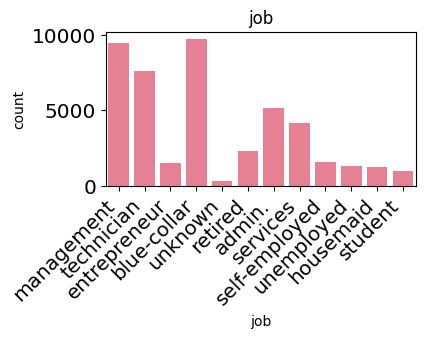

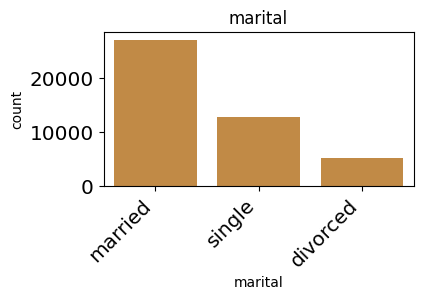

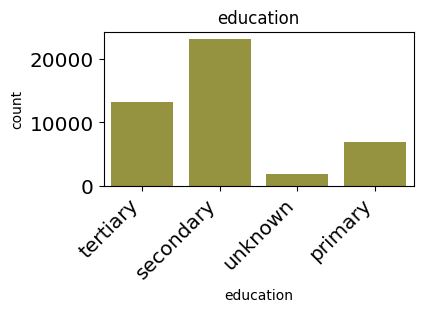

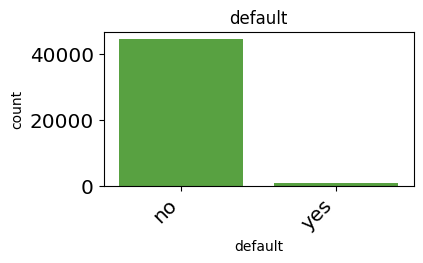

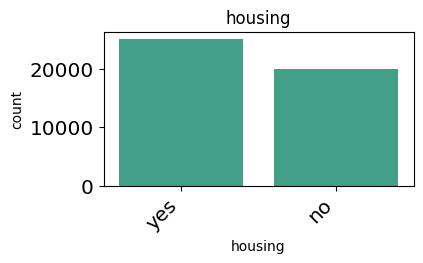

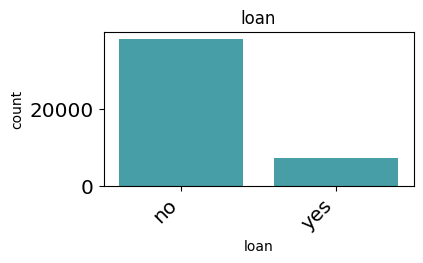

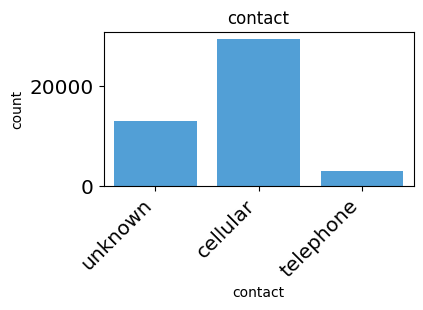

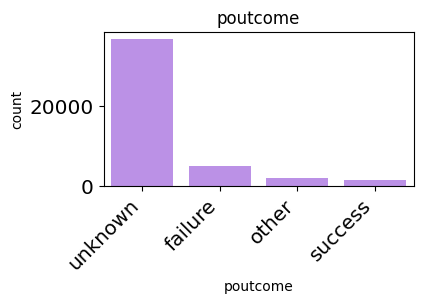

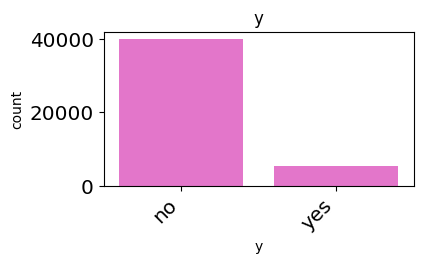

In [ ]:
colors = sns.color_palette('husl', n_colors=len(cats))

for i, column in enumerate(cats):
    plt.figure(figsize=(4, 2))
    sns.countplot(x=column, data=df, palette=[colors[i]])
    plt.xticks(rotation=45, ha='right')

    plt.title(f'{column}')
    plt.show()

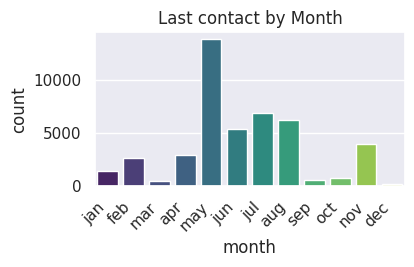

In [ ]:
plt.figure(figsize=(4, 2))
ax = sns.countplot(x='month', data=df, order=list(bulan_map), palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Last contact by Month')
plt.show()

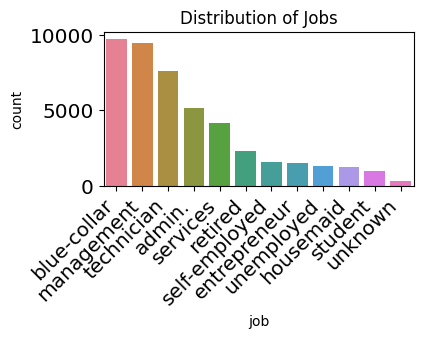

In [ ]:
job_counts = df['job'].value_counts().sort_values(ascending=False)

colors = sns.color_palette('husl', n_colors=len(job_counts))

plt.figure(figsize=(4, 2))
sns.countplot(x='job', data=df, order=job_counts.index, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Jobs')
plt.show()

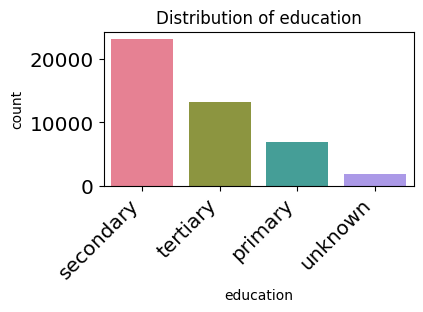

In [ ]:
job_counts = df['education'].value_counts().sort_values(ascending=False)

colors = sns.color_palette('husl', n_colors=len(job_counts))

plt.figure(figsize=(4, 2))
sns.countplot(x='education', data=df, order=job_counts.index, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of education')
plt.show()

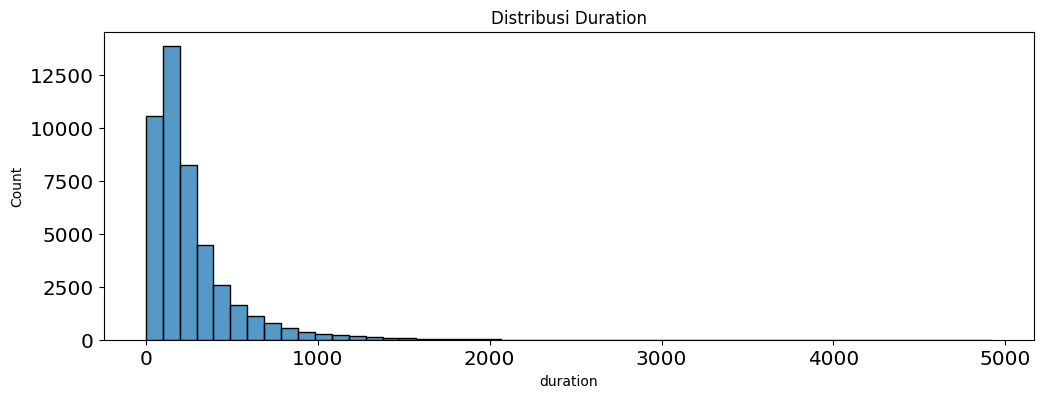

In [ ]:
sns.histplot(x="duration", data=df, bins = 50)
plt.title(f'Distribusi Duration')
plt.show()

Last contact duration kebanyak berlangsung kurang dari 1000 detik.


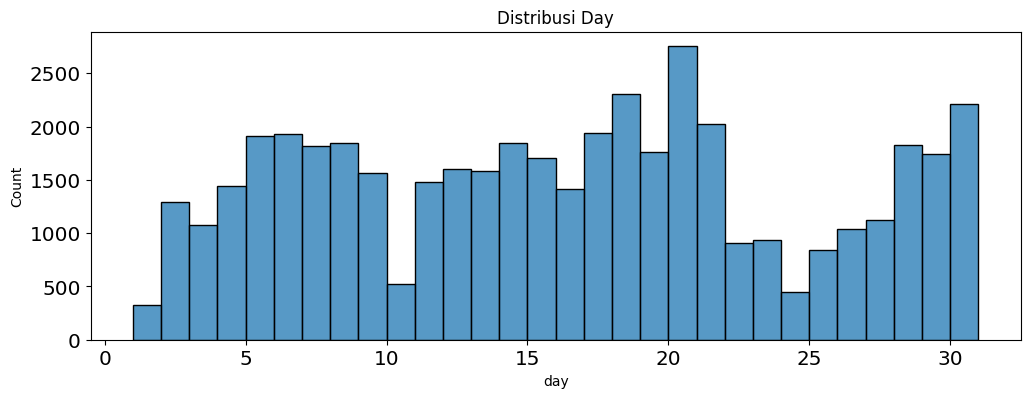

In [ ]:
sns.histplot(x="day", data=df, bins = 30)
plt.title(f'Distribusi Day')
plt.show()

Kebanyakan data menunjukkan last contact day of the month adalah tanggal 20-21.


# Multivariate Analysis

In [ ]:
df.corr()

<ipython-input-22-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<ipython-input-5-2f6a4f43af1a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


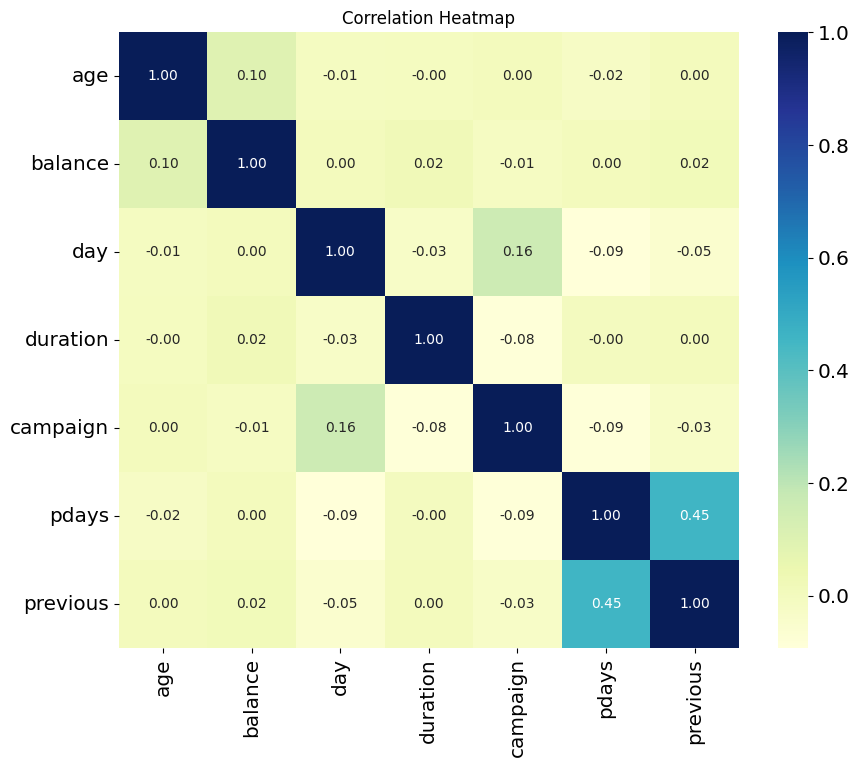

In [ ]:
#correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap ='YlGnBu', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

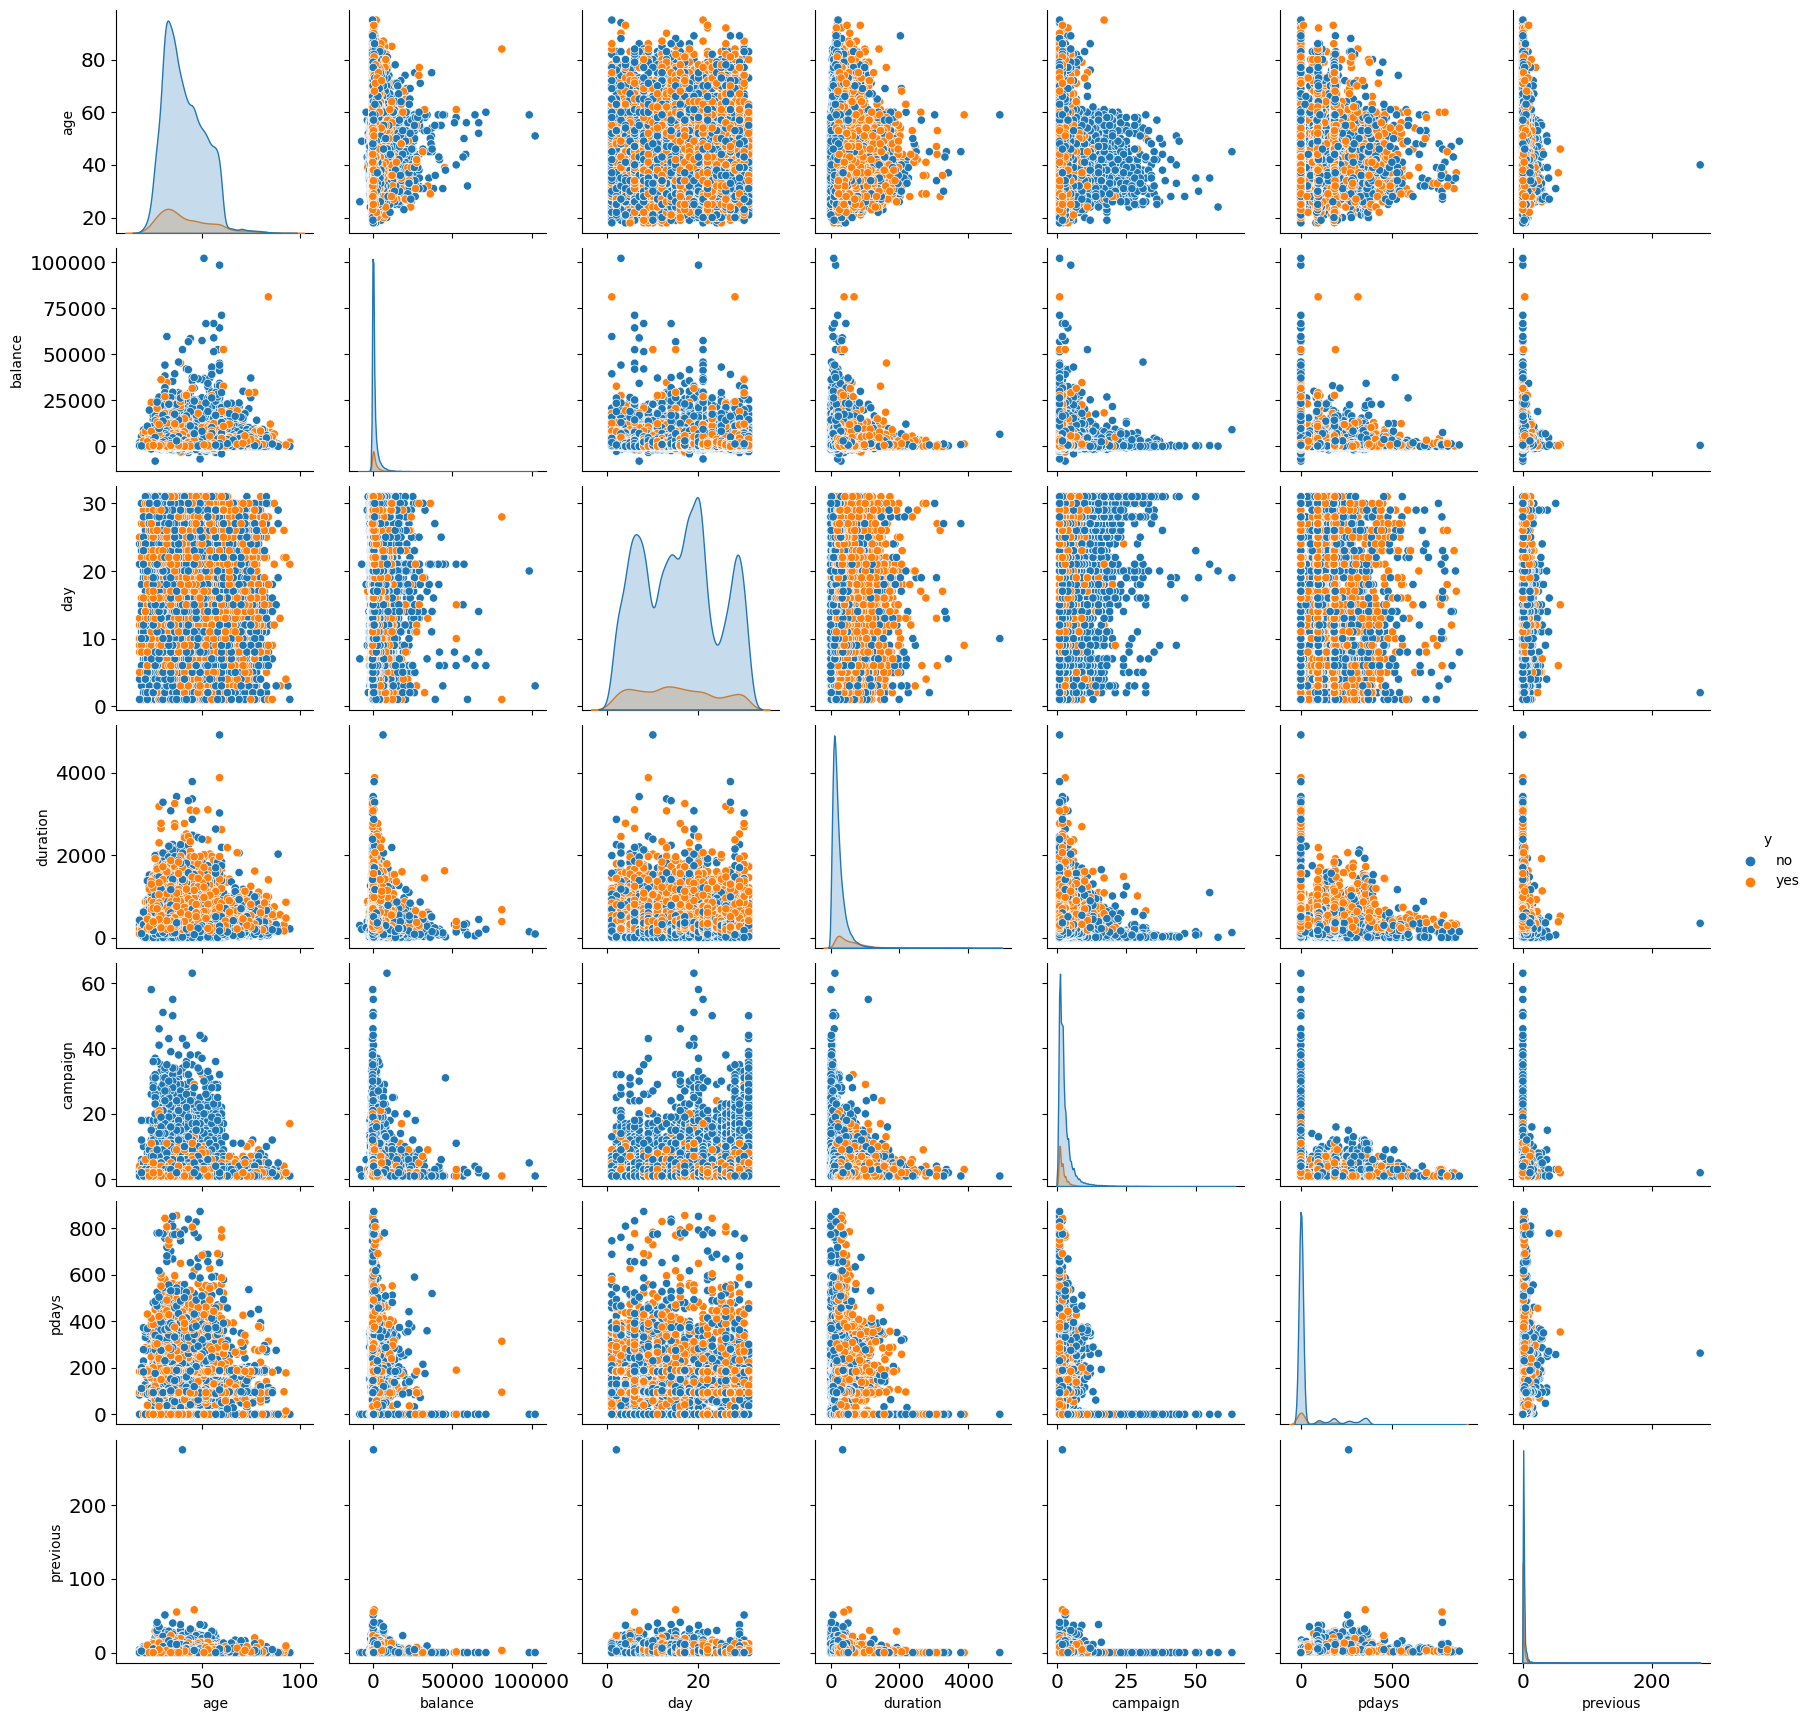

In [ ]:
#Pair Plots
cat = ('job','marital','education','default','housing','loan','contact','month','poutcome','y')
sns.pairplot(df, diag_kind ='kde', hue = 'y')

A. Korelasi antara fitur dan label:
Korelasi antara feature dan label yang mengindikasikan kombinasi yang baik :
- age & duration <br>
- day & duration <br>
- day & pdays <br>
- pdays & duration

B. Korelasi antar feature :

Berdasarkan heatmap ini, dapat dilihat bahwa korelasi antar feature tidak terlalu kuat karena sebagian besar nilai korelasi tidak melebihi angka 0,7. Namun ada beberapa fitur yang yang memiliki nilai yang lebih tinggi dengan yang lain yaitu korelasi antara pdays & previous yang memiliki korelasi positif sebesar (0.45), day & campaign (0.16), age & balance (0.10), campaign & pdays, pdays & days dengan nilai korelasi negatif (-0,09)

Tindakan yang perlu dilakukan adalah menjaga fitur fitur yang memiliki nilai korelasi tinggi untuk dilakukan analisis lebih lanjut guna memahami hubungan hubungan antar fitur tersebut.


# Business Insight

## Business Insight Berdasarkan Profesi dan Loans

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
pout_succ = df[df['poutcome'] == 'success']

In [ ]:
pout_succ

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24080,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
24165,30,admin.,married,secondary,no,873,yes,no,telephone,12,nov,119,1,167,3,success,no
24239,48,admin.,divorced,secondary,no,295,yes,no,cellular,17,nov,123,1,164,2,success,no
24264,49,management,married,tertiary,no,64,no,no,cellular,17,nov,208,1,159,1,success,no
24435,42,technician,married,tertiary,no,14282,yes,no,cellular,17,nov,77,1,103,4,success,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45190,32,blue-collar,married,secondary,no,136,no,no,cellular,16,nov,206,1,188,3,success,yes
45193,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df['housing_loan'] = df['housing'] + '_' + df['loan']

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,housing_loan
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,yes_no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,yes_no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,yes_yes
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,yes_no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,no_no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,no_no
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,no_no
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,no_no
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,no_no


In [ ]:
no_loans = df[df['housing_loan'] == 'no_no']

In [ ]:
df_insight = df.copy()
df_insight = pd.pivot_table(df_insight,
                                index=['job'],
                                columns=['y'],
                                aggfunc={'y':'count'})
df_insight.columns =['no','yes']
df_insight['total'] = df_insight['yes'] + df_insight['no']
df_insight['ratio yes'] = round((df_insight['yes']/(df_insight['total'])) , 2)
df_insight['ratio no'] = round((df_insight['no']/(df_insight['total'])) , 2)
df_insight.reset_index(inplace=True)
df_insight = df_insight.sort_values('ratio yes', ascending = False)
df_insight

,job,no,yes,total,ratio yes,ratio no
8,student,669,269,938,0.29,0.71
5,retired,1748,516,2264,0.23,0.77
10,unemployed,1101,202,1303,0.16,0.84
4,management,8157,1301,9458,0.14,0.86
0,admin.,4540,631,5171,0.12,0.88
6,self-employed,1392,187,1579,0.12,0.88
11,unknown,254,34,288,0.12,0.88
9,technician,6757,840,7597,0.11,0.89
3,housemaid,1131,109,1240,0.09,0.91
7,services,3785,369,4154,0.09,0.91


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'student'),
  Text(1, 0, 'retired'),
  Text(2, 0, 'unemployed'),
  Text(3, 0, 'management'),
  Text(4, 0, 'admin.'),
  Text(5, 0, 'self-employed'),
  Text(6, 0, 'unknown'),
  Text(7, 0, 'technician'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'services'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'blue-collar')])

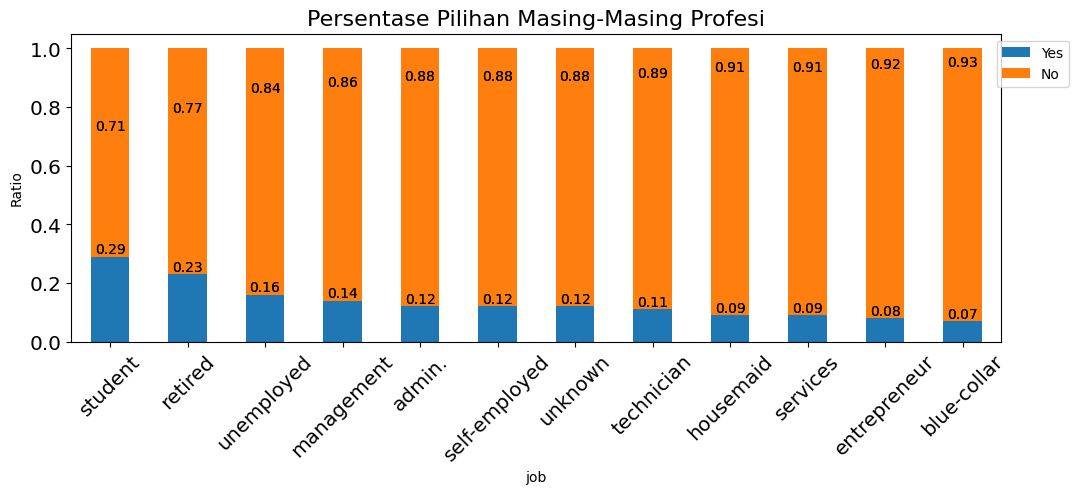

In [ ]:
fig, ax = plt.subplots()
df_insight.plot(kind='bar', x='job', y=['ratio yes', 'ratio no'], stacked=True, ax=ax)

bars = df_insight.plot(kind='bar', x='job', y=['ratio yes', 'ratio no'], stacked=True, ax=ax)

# Adding labels and title
ax.set_xlabel('job')
ax.set_ylabel('Ratio')
ax.set_title('Persentase Pilihan Masing-Masing Profesi',fontsize=16)

# Adding legend
ax.legend(['Yes', 'No'],bbox_to_anchor=(1.08, 1), loc='upper right')

# Adding labels on each bar
for bar in bars.patches:
    yval = bar.get_height()
    ax.annotate(f'{yval:.2f}', (bar.get_x() + bar.get_width() / 2, yval),
                ha='center', va='bottom')

plt.xticks(rotation = 45)

In [ ]:
job_bal = df.groupby(['job']).agg({'balance' : 'mean'}).reset_index()
job_bal = job_bal.sort_values('balance', ascending = False)
job_bal

,job,balance
5,retired,1984.215106
11,unknown,1772.357639
4,management,1763.616832
6,self-employed,1647.970868
10,unemployed,1521.745971
2,entrepreneur,1521.470074
3,housemaid,1392.395161
8,student,1388.060768
9,technician,1252.632092
0,admin.,1135.838909


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'retired'),
  Text(1, 0, 'unknown'),
  Text(2, 0, 'management'),
  Text(3, 0, 'self-employed'),
  Text(4, 0, 'unemployed'),
  Text(5, 0, 'entrepreneur'),
  Text(6, 0, 'housemaid'),
  Text(7, 0, 'student'),
  Text(8, 0, 'technician'),
  Text(9, 0, 'admin.'),
  Text(10, 0, 'blue-collar'),
  Text(11, 0, 'services')])

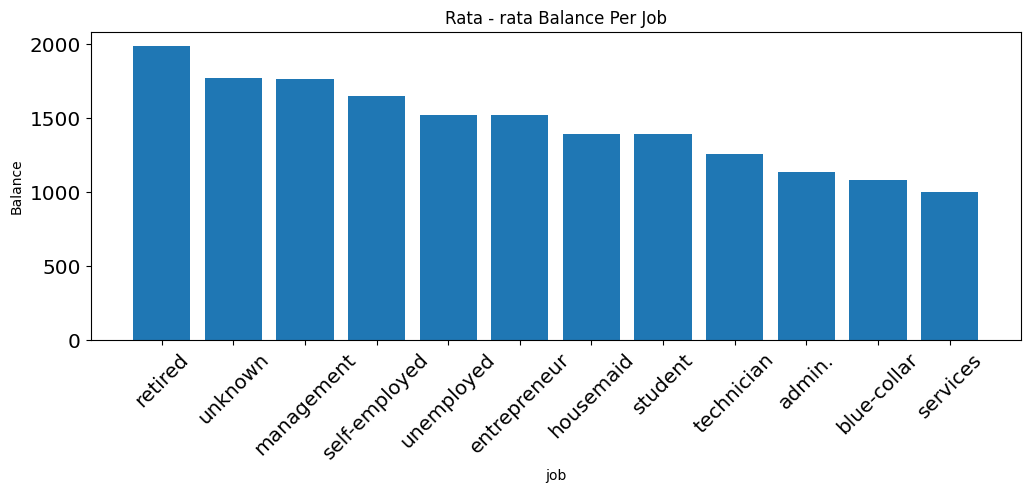

In [ ]:
plt.bar (x="job", height ="balance", data = job_bal)
plt.title('Rata - rata Balance Per Job')
plt.xlabel('job')
plt.ylabel( 'Balance')
plt.xticks(rotation = 45)

In [ ]:
df_insight2 = df.copy()
df_insight2 = pd.pivot_table(df_insight2,
                                index=['housing_loan'],
                                columns=['y'],
                                aggfunc={'y':'count'})
df_insight2.columns =['no','yes']
df_insight2['total'] = df_insight2['yes'] + df_insight2['no']
df_insight2['ratio yes'] = round((df_insight2['yes']/(df_insight2['total'])) , 2)
df_insight2['ratio no'] = round((df_insight2['no']/(df_insight2['total'])) , 2)
df_insight2.reset_index(inplace=True)
df_insight2['housing_loan'] = df_insight2['housing_loan'].replace({
    'yes_no': 'has_housing_loans',
    'no_no': 'no_loans',
    'yes_yes': 'has_both_loan',
    'no_yes': 'has_personal_loan'
})
df_insight2 = df_insight2.sort_values('ratio yes', ascending = False)
df_insight2

,housing_loan,no,yes,total,ratio yes,ratio no
0,no_loans,14069,3135,17204,0.18,0.82
1,has_personal_loan,2658,219,2877,0.08,0.92
2,has_housing_loans,19093,1670,20763,0.08,0.92
3,has_both_loan,4102,265,4367,0.06,0.94


(array([0, 1, 2, 3]),
 [Text(0, 0, 'no_loans'),
  Text(1, 0, 'has_personal_loan'),
  Text(2, 0, 'has_housing_loans'),
  Text(3, 0, 'has_both_loan')])

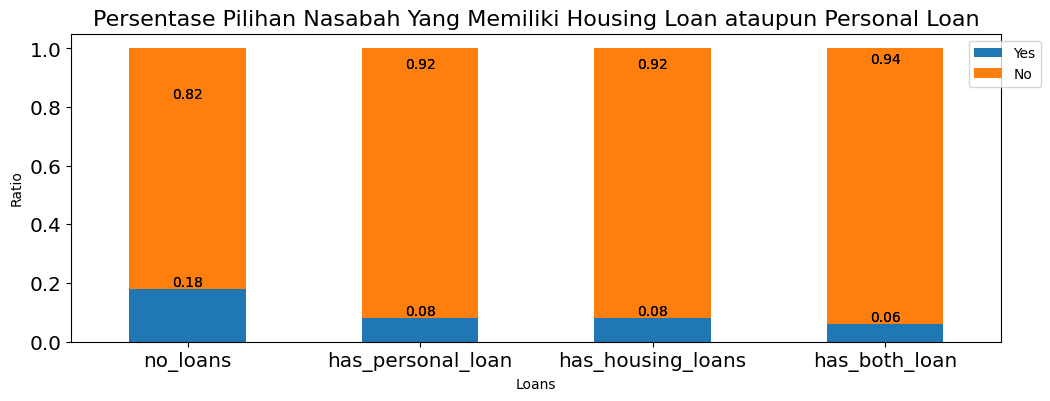

In [ ]:
fig, ax = plt.subplots()
df_insight2.plot(kind='bar', x='housing_loan', y=['ratio yes', 'ratio no'], stacked=True, ax=ax)

bars = df_insight2.plot(kind='bar', x='housing_loan', y=['ratio yes', 'ratio no'], stacked=True, ax=ax)

# Adding labels and title
ax.set_xlabel('Loans')
ax.set_ylabel('Ratio')
ax.set_title('Persentase Pilihan Nasabah Yang Memiliki Housing Loan ataupun Personal Loan',fontsize=16)

# Adding legend
ax.legend(['Yes', 'No'],bbox_to_anchor=(1.05, 1), loc='upper right')

# Adding labels on each bar
for bar in bars.patches:
    yval = bar.get_height()
    ax.annotate(f'{yval:.2f}', (bar.get_x() + bar.get_width() / 2, yval),
                ha='center', va='bottom')

plt.xticks(rotation = 360)

In [ ]:
df_insight3 = no_loans.copy()
df_insight3 = pd.pivot_table(df_insight3,
                                index=['job'],
                                columns=['y'],
                                aggfunc={'y':'count'})
df_insight3.columns =['no','yes']
df_insight3['total'] = df_insight3['yes'] + df_insight3['no']
df_insight3['ratio yes'] = round((df_insight3['yes']/(df_insight3['total'])) , 2)
df_insight3['ratio no'] = round((df_insight3['no']/(df_insight3['total'])) , 2)
df_insight3.reset_index(inplace=True)
df_insight3 = df_insight3.sort_values('ratio yes', ascending = False)
df_insight3

,job,no,yes,total,ratio yes,ratio no
8,student,434,247,681,0.36,0.64
5,retired,1112,453,1565,0.29,0.71
10,unemployed,555,159,714,0.22,0.78
0,admin.,1289,313,1602,0.20,0.80
4,management,3404,829,4233,0.20,0.80
6,self-employed,603,112,715,0.16,0.84
9,technician,2528,461,2989,0.15,0.85
7,services,933,158,1091,0.14,0.86
2,entrepreneur,410,61,471,0.13,0.87
11,unknown,228,32,260,0.12,0.88


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'student'),
  Text(1, 0, 'retired'),
  Text(2, 0, 'unemployed'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'management'),
  Text(5, 0, 'self-employed'),
  Text(6, 0, 'technician'),
  Text(7, 0, 'services'),
  Text(8, 0, 'entrepreneur'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'blue-collar'),
  Text(11, 0, 'housemaid')])

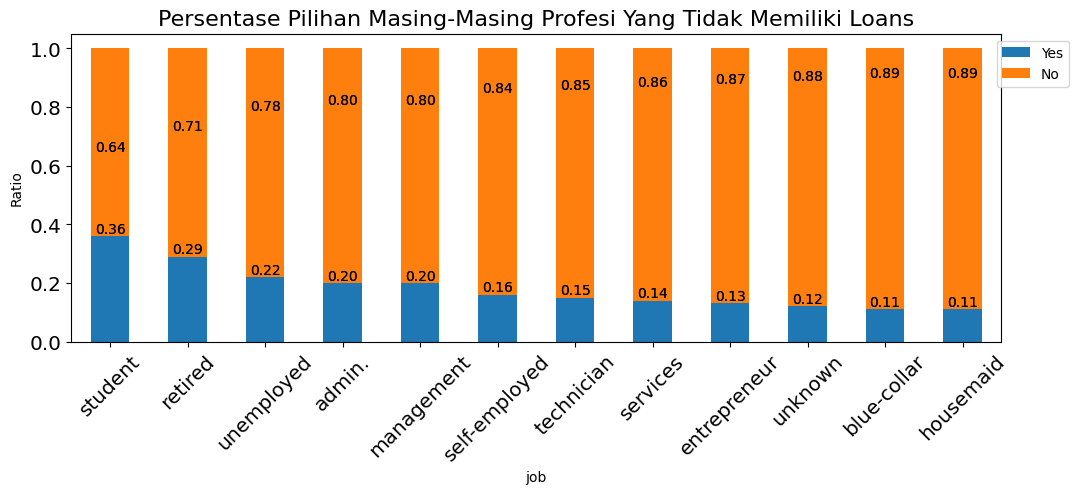

In [ ]:
fig, ax = plt.subplots()
df_insight3.plot(kind='bar', x='job', y=['ratio yes', 'ratio no'], stacked=True, ax=ax)

bars = df_insight3.plot(kind='bar', x='job', y=['ratio yes', 'ratio no'], stacked=True, ax=ax)

# Adding labels and title
ax.set_xlabel('job')
ax.set_ylabel('Ratio')
ax.set_title('Persentase Pilihan Masing-Masing Profesi Yang Tidak Memiliki Loans',fontsize=16)

# Adding legend
ax.legend(['Yes', 'No'],bbox_to_anchor=(1.08, 1), loc='upper right')

# Adding labels on each bar
for bar in bars.patches:
    yval = bar.get_height()
    ax.annotate(f'{yval:.2f}', (bar.get_x() + bar.get_width() / 2, yval),
                ha='center', va='bottom')

plt.xticks(rotation = 45)

- Nasabah yang membuka term deposit didominasi oleh nasabah yang berprofesi sebagai student, retired, unemployed, dan management.
- Nasabah yang memiliki saldo rata - rata tahunan tertinggi dimiliki oleh nasabah dengan profesi retired, unknown, management, self-employed, unemployed, dan entrepreneur dengan saldo rata - rata tahunan di atas 1500.
- Nasabah yang membuka term deposit didominasi oleh nasabah yang tidak memiliki housing loans maupun personal loans. Dan jika nasabah yang sama sekali tidak memiliki loans dan dilihat berdasarkan pekerjaannya, customer yang membuka term deposit kebanyakan beprofesi sebagai student, retired, unemployed, admin, dan management. Direkomendasikan untuk menghubungi calon nasabah yang berprofesi sebagai self-employed, dan entrepreneur mengingat nasabah tersebut memiliki saldo rata - rata tahunan yang cukup tinggi.



## Business Insight : Pengaruh Campaign Terhadap Decision Nasabah

In [ ]:
df.groupby(['y']).agg({'campaign' : 'mean'}).reset_index()

,y,campaign
0,no,2.846350
1,yes,2.141047


In [ ]:
yes = df[df['y']=='yes']
no = df[df['y']=='no']

In [ ]:
import scipy.stats as st
# Hypothesis Testing using mann withney
stat, p_value= st.mannwhitneyu(yes['campaign'],no['campaign'],alternative='two-sided')
p_value

1.9484904873905108e-71

In [ ]:
alpha = 0.05
print('P-Value :',p_value)

if p_value >= alpha:
    print('Tidak cukup bukti jumlah campaign mampu membedakan user untuk membuka akun atau tidak')
else:
    print('cukup bukti jumlah campaign mampu membedakan user untuk membuka akun atau tidak')

P-Value : 1.9484904873905108e-71
cukup bukti jumlah campaign mampu membedakan user untuk membuka akun atau tidak


Hasil uji hipotesis menunjukkan bahwa p-value < alpha, maka kita akan mengambil keputusan bahwa jumlah campaign berpengaruh terhadap nasabah untuk membuka akun atau tidak secara signifikan.


Namun berdasarkan berdasarkan rata-rata ternyata semakin banyak campaign yang diberikan ternyata user akan semakin menolak membuka akun.


Jadi kesimpulannya, jumlah campaign berhubungan terbalik dengan user membuka akun.

## Business Insight Berdasarkan Tingkat Pendidikan

In [ ]:
df_edu_insight = df.copy()
df_edu_insight = pd.pivot_table(df_edu_insight,
                                index=['education'],
                                columns=['y'],
                                aggfunc={'y':'count'})
df_edu_insight.columns =['no','yes']
df_edu_insight['total_edu'] = df_edu_insight['yes'] + df_edu_insight['no']
df_edu_insight['ratio yes'] = round((df_edu_insight['yes']/(df_edu_insight['total_edu'])) , 3)
df_edu_insight['ratio no'] = round((df_edu_insight['no']/(df_edu_insight['total_edu'])) , 3)
df_edu_insight.reset_index(inplace=True)
df_edu_insight

,education,no,yes,total_edu,ratio yes,ratio no
0,primary,6260,591,6851,0.086,0.914
1,secondary,20752,2450,23202,0.106,0.894
2,tertiary,11305,1996,13301,0.150,0.850
3,unknown,1605,252,1857,0.136,0.864


(array([0, 1, 2, 3]),
 [Text(0, 0, 'primary'),
  Text(1, 0, 'secondary'),
  Text(2, 0, 'tertiary'),
  Text(3, 0, 'unknown')])

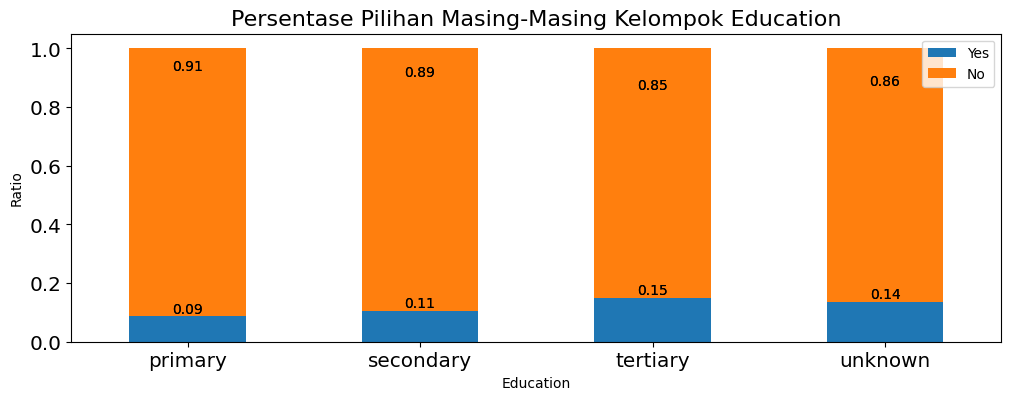

In [ ]:
fig, ax = plt.subplots()
df_edu_insight.plot(kind='bar', x='education', y=['ratio yes', 'ratio no'], stacked=True, ax=ax)

bars = df_edu_insight.plot(kind='bar', x='education', y=['ratio yes', 'ratio no'], stacked=True, ax=ax)

# Adding labels and title
ax.set_xlabel('Education')
ax.set_ylabel('Ratio')
ax.set_title('Persentase Pilihan Masing-Masing Kelompok Education',fontsize=16)

# Adding legend
ax.legend(['Yes', 'No'], loc='upper right')

# Adding labels on each bar
for bar in bars.patches:
    yval = bar.get_height()
    ax.annotate(f'{yval:.2f}', (bar.get_x() + bar.get_width() / 2, yval),
                ha='center', va='bottom')

plt.xticks(rotation = 360)

In [ ]:
df_edu_insight_yes = df.copy()
df_edu_insight_yes = pd.pivot_table(df_edu_insight_yes,
                                index=['education'],
                                columns=['y'],
                                aggfunc={'y':'count'})
df_edu_insight_yes.columns =['no','yes']
df_edu_insight_yes.drop(['no'],axis=1,inplace=True)
df_edu_insight_yes.reset_index(inplace=True)
df_edu_insight_yes['total_yes'] = df_edu_insight_yes['yes'].sum()
df_edu_insight_yes['ratio yes (%)'] = round((df_edu_insight_yes['yes']/(df_edu_insight_yes['total_yes'])) , 2)
df_edu_insight_yes

,education,yes,total_yes,ratio yes (%)
0,primary,591,5289,0.11
1,secondary,2450,5289,0.46
2,tertiary,1996,5289,0.38
3,unknown,252,5289,0.05


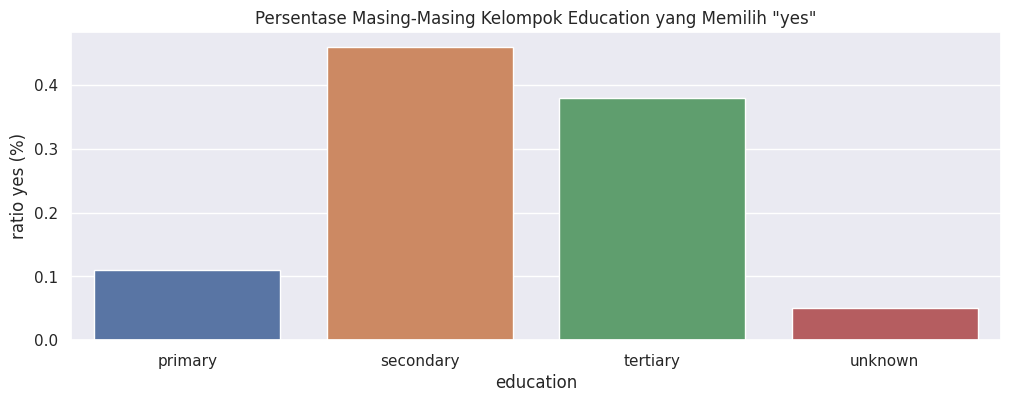

In [ ]:
sns.set_theme(style='darkgrid')
sns.barplot(data=df_edu_insight_yes , x='education', y='ratio yes (%)')
plt.title('Persentase Masing-Masing Kelompok Education yang Memilih "yes"')
plt.show()

- Pada visualisasi diatas dapat dilihat bahwa kelompok education tertiary (lulusan S1 atau di atasnya) paling banyak memilih untuk mendaftar deposito berjangka sebanyak 15% dibanding total yang mendaftar, yang diikuti oleh kelompok education yang tidak diketahui, lalu secondary (lulusan SMP dan SMA) dan terakhir primary (Lulusan SD ke bawah).
- Dengan membandingkan terhadap mereka yang mengambil yes saja, terlihat bahwa kelompok education secondary paling banyak memilih yes, diikuti dekat kelompok tertiary, lalu primary dan kelompok Education yang tidak diketahui.
- Dari insight tersebut, rekomendasi bisnis yang dapat diberikan adalah menargetkan campaign terhadap kelompok tertiary. Bisa di daerah kampus, universitas, mengajak investasi sebagai kesempatan untuk mendapatkan passive income untuk uang yang mungkin telah mereka tabung.
- Rekomendasi ke dua, bisa ditargetkan untuk mereka yang masih di jenjang sekolah, utamanya secondary. Bisa melakukan campaign ke sekolah-sekolah, melibatkan orang tua, untuk membuka rekening dan deposito dini.


## Business Insight Berdasarkan Tipe Contact

In [ ]:
df_contact_insight = df.copy()
df_contact_insight = pd.pivot_table(df_contact_insight,
                                index=['contact'],
                                columns=['y'],
                                aggfunc={'y':'count'})
df_contact_insight.columns =['no','yes']
df_contact_insight['total_cont'] = df_contact_insight['yes'] + df_contact_insight['no']
df_contact_insight['ratio yes'] = round((df_contact_insight['yes']/(df_contact_insight['total_cont'])) , 3)
df_contact_insight['ratio no'] = round((df_contact_insight['no']/(df_contact_insight['total_cont'])) , 3)
df_contact_insight.reset_index(inplace=True)
df_contact_insight

,contact,no,yes,total_cont,ratio yes,ratio no
0,cellular,24916,4369,29285,0.149,0.851
1,telephone,2516,390,2906,0.134,0.866
2,unknown,12490,530,13020,0.041,0.959


(array([0, 1, 2]),
 [Text(0, 0, 'cellular'), Text(1, 0, 'telephone'), Text(2, 0, 'unknown')])

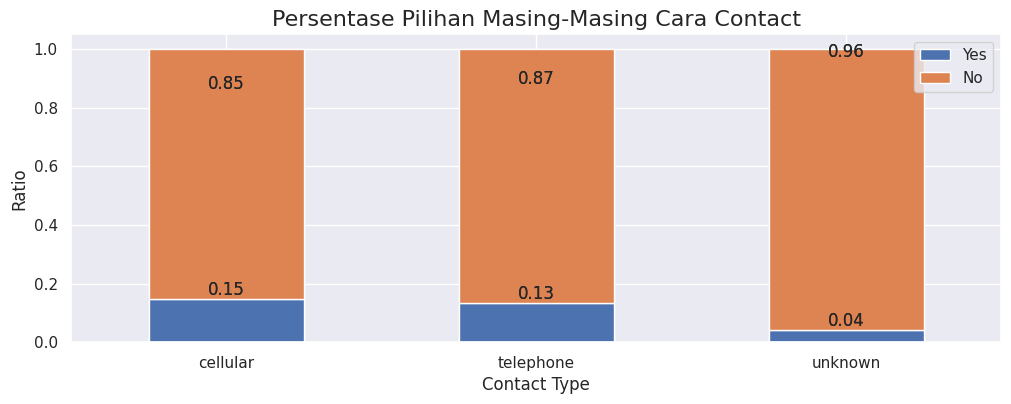

In [ ]:
fig, ax = plt.subplots()
df_contact_insight.plot(kind='bar', x='contact', y=['ratio yes', 'ratio no'], stacked=True, ax=ax)

bars = df_contact_insight.plot(kind='bar', x='contact', y=['ratio yes', 'ratio no'], stacked=True, ax=ax)

# Adding labels and title
ax.set_xlabel('Contact Type')
ax.set_ylabel('Ratio')
ax.set_title('Persentase Pilihan Masing-Masing Cara Contact',fontsize=16)

# Adding legend
ax.legend(['Yes', 'No'], loc='upper right')

# Adding labels on each bar
for bar in bars.patches:
    yval = bar.get_height()
    ax.annotate(f'{yval:.2f}', (bar.get_x() + bar.get_width() / 2, yval),
                ha='center', va='bottom')

plt.xticks(rotation = 360)

In [ ]:
df_contact_insight_yes = df.copy()
df_contact_insight_yes = pd.pivot_table(df_contact_insight_yes,
                                index=['contact'],
                                columns=['y'],
                                aggfunc={'y':'count'})
df_contact_insight_yes.columns =['no','yes']
df_contact_insight_yes.drop(['no'],axis=1,inplace=True)
df_contact_insight_yes.reset_index(inplace=True)
df_contact_insight_yes['total_yes'] = df_contact_insight_yes['yes'].sum()
df_contact_insight_yes['ratio yes (%)'] = round((df_contact_insight_yes['yes']/(df_contact_insight_yes['total_yes'])) , 2)

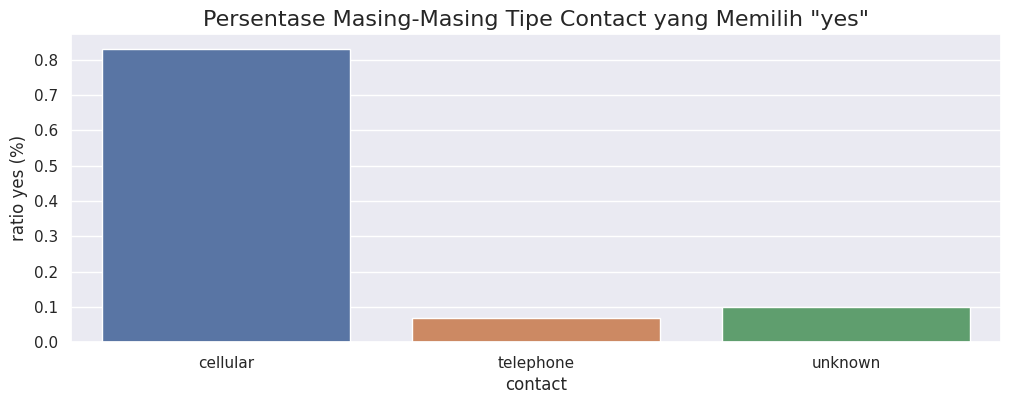

In [ ]:
sns.set_theme(style='darkgrid')
sns.barplot(data=df_contact_insight_yes , x='contact', y='ratio yes (%)')
plt.title('Persentase Masing-Masing Tipe Contact yang Memilih "yes"',fontsize=16)
plt.show()

Bisa dilihat melalui visualisasi diatas bahwa tipe contact cellular (HP) merupakan tipe contact yang paling banyak menghasilkan customer untuk mendaftar deposito berjangka. Hal ini bisa terjadi karena di era sekarang ini orang-orang lebih banyak melakukan komunikasi melalui telepon celullar dibandingkan telepon biasa (telepon rumah), dan hampir setiap orang pasti mempunyai telepon cellular. Dari sini pihak bank direkomendasi mulai merubah strategi campaign untuk memprioritaskan melakukan contact melalui telepon celullar. Selain itu pihak bank sebelum melakukan panggilan secara langsung ke nomor telepon celullar, bisa juga bisa melakukan campaign melalui email atau melalui whatsapp sebagai tahapan awal dalam menawarkan deposito berjangka. Dengan demikian peluang customer yang mendaftar deposito berjangka akan meningkat.


## Business Insight Berdasarkan Status Pernikahan

In [ ]:
df_marital_insight = df.copy()
df_marital_insight = pd.pivot_table(df_marital_insight,
                                index=['marital'],
                                columns=['y'],
                                aggfunc={'y':'count'})
df_marital_insight.columns =['no','yes']
df_marital_insight.drop(['no'],axis=1,inplace=True)
df_marital_insight.reset_index(inplace=True)
df_marital_insight['total_yes'] = df_marital_insight['yes'].sum()
df_marital_insight['ratio yes (%)'] = round((df_marital_insight['yes']/(df_marital_insight['total_yes'])) , 2)

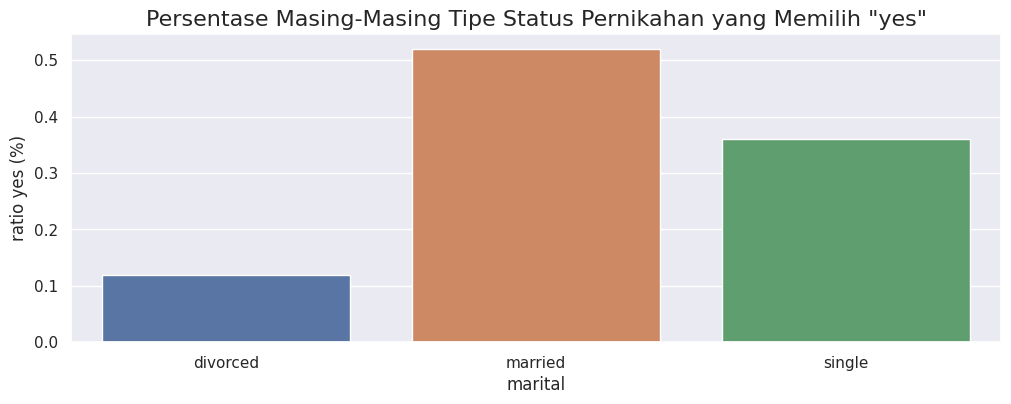

In [ ]:
sns.set_theme(style='darkgrid')
sns.barplot(data=df_marital_insight , x='marital', y='ratio yes (%)')
plt.title('Persentase Masing-Masing Tipe Status Pernikahan yang Memilih "yes"',fontsize=16)
plt.show()

* Hasil visualisasi diatas dapat dilihat bahwa customer yang berstatus menikah dan single yang memiliki persentase paling besar untuk mendaftar deposito berjangka. Oleh sebab itu pihak bank bisa mulai fokus untuk memprioritaskan customer yang berstatus menikah dan single. Selain itu untuk meningkatkan kedua kelompok tersebut dalam mendaftar deposito berjangka pihak bank saat melakukan campaign kepada masing-masing individu dua kelompok tersebut dapat melakukan promosi dengan strategi pendekatan yang berbeda. Misalkan kepada kelompok "single" bisa melakukan promosi seperti "dengan bunga deposito dalam setahun adalah x% maka kira-kira dalam y tahun dana menikah akan dapat terkumpul". Sedangkan untuk kelompok "married" bisa melakukan promosi seperti "dengan bunga deposito dalam setahun adalah x% maka dana pendidikan untuk anak/dana pensiun saat masa tua akan terjamin"